# Phân tích dữ liệu


In [2786]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2787]:
df = pd.read_csv('./data/VIC.csv')
print(df.head())
print(df.info())

  Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
0    VIC  10/17/2018 9:39  98.5  98.5  98.5   98.5     390              0
1    VIC  10/17/2018 9:40  98.5  98.5  98.5   98.5     760              0
2    VIC  10/17/2018 9:41  98.6  98.6  98.6   98.6    2060              0
3    VIC  10/17/2018 9:42  98.6  98.6  98.6   98.6    5540              0
4    VIC  10/17/2018 9:43  98.6  98.7  98.6   98.7     760              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int6

In [2788]:
# chuyen du lieu thanh datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.drop(columns=['Open Interest'])
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Ticker     101266 non-null  object        
 1   Date/Time  101266 non-null  datetime64[ns]
 2   Open       101266 non-null  float64       
 3   High       101266 non-null  float64       
 4   Low        101266 non-null  float64       
 5   Close      101266 non-null  float64       
 6   Volume     101266 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.4+ MB
None
  Ticker           Date/Time  Open  High   Low  Close  Volume
0    VIC 2018-10-17 09:39:00  98.5  98.5  98.5   98.5     390
1    VIC 2018-10-17 09:40:00  98.5  98.5  98.5   98.5     760
2    VIC 2018-10-17 09:41:00  98.6  98.6  98.6   98.6    2060
3    VIC 2018-10-17 09:42:00  98.6  98.6  98.6   98.6    5540
4    VIC 2018-10-17 09:43:00  98.6  98.7  98.6   98.7     760


In [2789]:
# Tính khoảng cách thời gian giữa các dòng liên tiếp (tính bằng giây)
time_diffs = df['Date/Time'].diff().dt.total_seconds()

# Chuyển đổi từ giây sang phút (chia cho 60)
time_diffs_minutes = time_diffs / 60

# Tính trung bình khoảng cách (loại bỏ NaN ở dòng đầu tiên)
average_time_diff = time_diffs_minutes.dropna().mean()

max_time_diff = time_diffs_minutes.dropna().max()

min_time_diff = time_diffs_minutes.dropna().min()

# In kết quả
print(f'Trung bình khoảng cách thời gian giữa các dòng: {average_time_diff:.2f} phút')

print(f'Max khoảng cách thời gian giữa các dòng: {max_time_diff:.2f} phút')

print(f'Min khoảng cách thời gian giữa các dòng: {min_time_diff:.2f} phút')


Trung bình khoảng cách thời gian giữa các dòng: 11.34 phút
Max khoảng cách thời gian giữa các dòng: 14069.00 phút
Min khoảng cách thời gian giữa các dòng: 1.00 phút


In [2790]:
df.set_index('Date/Time', inplace=True)

# Tổng hợp theo ngày
df_daily = df.resample('1D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
df_daily.head(20)


,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-10-17,98.5,99.6,98.3,99.0,1266610
2018-10-18,98.5,99.2,98.0,99.1,896140
2018-10-19,96.5,99.1,96.5,99.1,915870
2018-10-20,NaN,NaN,NaN,NaN,0
2018-10-21,NaN,NaN,NaN,NaN,0
2018-10-22,98.1,99.6,97.1,99.1,536930
2018-10-23,98.1,99.0,96.5,99.0,608750
2018-10-24,98.0,99.5,97.5,98.8,681290
2018-10-25,96.7,98.2,94.6,96.8,404050


In [2791]:
df_daily = df_daily.dropna()
df_daily.head(20)

,Open,High,Low,Close,Volume
Date/Time,,,,,
2018-10-17,98.5,99.6,98.3,99.0,1266610
2018-10-18,98.5,99.2,98.0,99.1,896140
2018-10-19,96.5,99.1,96.5,99.1,915870
2018-10-22,98.1,99.6,97.1,99.1,536930
2018-10-23,98.1,99.0,96.5,99.0,608750
2018-10-24,98.0,99.5,97.5,98.8,681290
2018-10-25,96.7,98.2,94.6,96.8,404050
2018-10-26,96.2,98.0,95.7,96.4,653110
2018-10-29,95.5,97.7,95.0,97.2,643700


In [2792]:
date_diffs = df_daily.index.to_series().diff().dt.days.dropna()  # Tính khoảng cách ngày
avg_gap = date_diffs.mean()  # Trung bình khoảng cách
print("Trung bình khoảng cách giữa các ngày có dữ liệu:", avg_gap, "ngày")

Trung bình khoảng cách giữa các ngày có dữ liệu: 1.4570383912248628 ngày


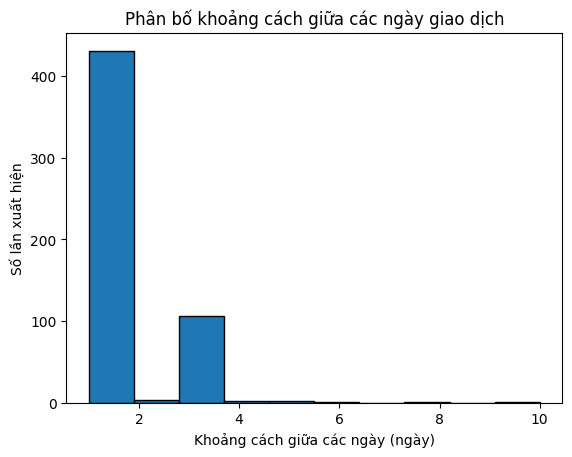

In [2793]:

plt.hist(date_diffs, bins=10, edgecolor='black')
plt.xlabel('Khoảng cách giữa các ngày (ngày)')
plt.ylabel('Số lần xuất hiện')
plt.title('Phân bố khoảng cách giữa các ngày giao dịch')
plt.show()

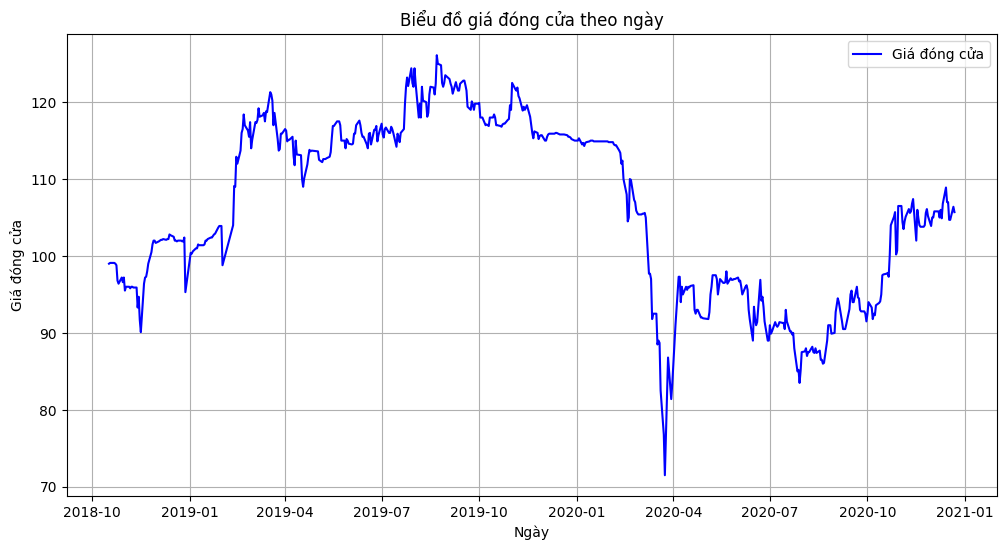

In [2794]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['Close'], linestyle='-', color='b', label='Giá đóng cửa')

# Định dạng biểu đồ
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa theo ngày')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

# Thêm các chỉ báo kĩ thuật

In [2795]:
import pandas_ta as ta

df_daily['OBV'] = ta.obv(close=df_daily['Close'], volume=df_daily['Volume']) 

df_daily['RSI_5'] = ta.rsi(close=df_daily['Close'], length=5)  

df_daily['Momentum'] = df_daily['Close'] - df_daily['Close'].shift(5)

df_daily['EMA_7'] = df_daily['Close'].ewm(span=7, adjust=False).mean()

df_daily['Price_Change'] = df_daily['Close'].shift(-1) - df_daily['Close']

df_daily['Close_t+1'] = df_daily['Close'].shift(-1)

df_daily = df_daily.dropna()  # Xóa các hàng  là NaN
df_daily.head(20)


,Open,High,Low,Close,Volume,OBV,RSI_5,Momentum,EMA_7,Price_Change,Close_t+1
Date/Time,,,,,,,,,,,
2018-10-24,98.0,99.5,97.5,98.8,681290,872710.0,12.761715,-0.2,98.982520,-2.0,96.8
2018-10-25,96.7,98.2,94.6,96.8,404050,468660.0,1.451988,-2.3,98.436890,-0.4,96.4
2018-10-26,96.2,98.0,95.7,96.4,653110,-184450.0,1.188638,-2.7,97.927667,0.8,97.2
2018-10-29,95.5,97.7,95.0,97.2,643700,459250.0,32.015031,-1.9,97.745750,-0.6,96.6
2018-10-30,95.5,97.3,95.5,96.6,452080,7170.0,24.770350,-2.4,97.459313,0.6,97.2
2018-10-31,95.6,97.2,95.6,97.2,582470,589640.0,41.357977,-1.6,97.394485,-1.7,95.5
2018-11-01,96.5,96.8,95.0,95.5,1225020,-635380.0,23.222901,-1.3,96.920863,0.5,96.0
2018-11-02,95.6,96.7,95.5,96.0,1484060,848680.0,33.881797,-0.4,96.690648,0.0,96.0
2018-11-05,96.0,96.5,95.1,96.0,664130,848680.0,33.881797,-1.2,96.517986,-0.2,95.8


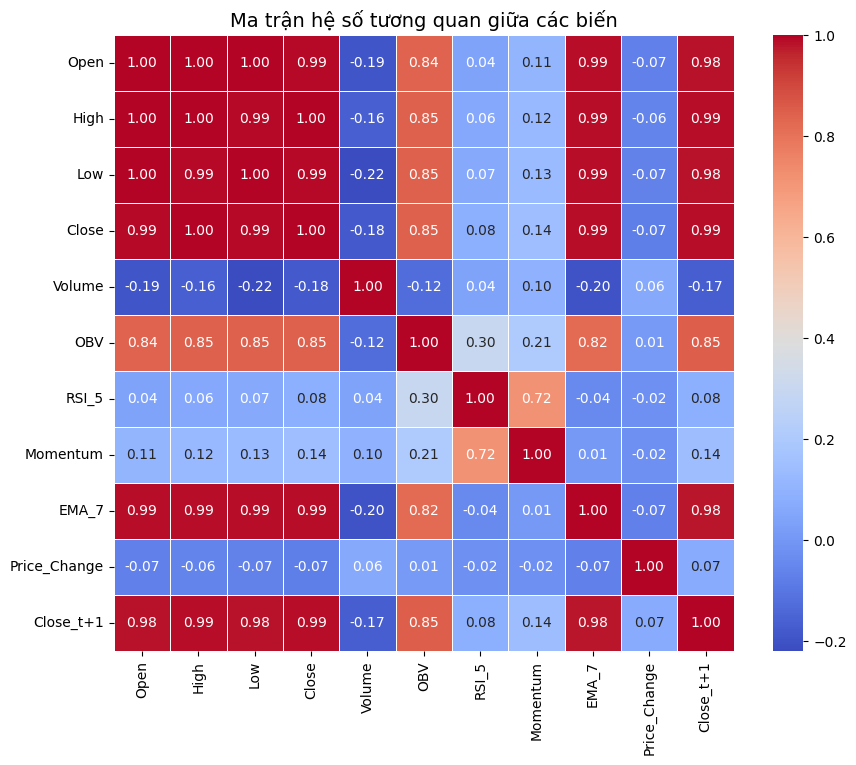

In [2796]:
import seaborn as sns


corr_matrix = df_daily.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tiêu đề
plt.title("Ma trận hệ số tương quan giữa các biến", fontsize=14)
plt.show()

In [2797]:
df_daily = df_daily.drop(columns='EMA_7')
df_daily['Price_Change'] = df_daily['Close'].shift(-1)-df_daily['Close']
df_daily = df_daily.dropna()
df_daily

,Open,High,Low,Close,Volume,OBV,RSI_5,Momentum,Price_Change,Close_t+1
Date/Time,,,,,,,,,,
2018-10-24,98.0,99.5,97.5,98.8,681290,872710.0,12.761715,-0.2,-2.0,96.8
2018-10-25,96.7,98.2,94.6,96.8,404050,468660.0,1.451988,-2.3,-0.4,96.4
2018-10-26,96.2,98.0,95.7,96.4,653110,-184450.0,1.188638,-2.7,0.8,97.2
2018-10-29,95.5,97.7,95.0,97.2,643700,459250.0,32.015031,-1.9,-0.6,96.6
2018-10-30,95.5,97.3,95.5,96.6,452080,7170.0,24.770350,-2.4,0.6,97.2
...,...,...,...,...,...,...,...,...,...,...
2020-12-14,106.7,108.9,105.5,108.9,1122380,7595580.0,77.340239,3.1,-1.9,107.0
2020-12-15,108.9,108.9,106.8,107.0,1205700,6389880.0,55.499573,2.0,0.0,107.0
2020-12-16,106.8,107.1,105.9,107.0,756200,6389880.0,55.499573,1.0,-2.3,104.7


# Chuẩn hóa dữ liệu


In [2798]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# Tách cột Close_t+1 ra trước khi chuẩn hóa
close_t1 = df_daily['Close_t+1'].copy()  # Lưu dữ liệu gốc của Close_t+1
df_daily = df_daily.drop(columns=['Close_t+1'])  # Xóa Close_t+1 khỏi df_daily

# Chuẩn hóa các cột còn lại
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
columns_min_max = ['Open', 'High', 'Low', 'Close', 'Volume', 'OBV', 'RSI_5', 'Momentum']
df_daily_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_daily[columns_min_max]), 
                               columns=columns_min_max, 
                               index=df_daily.index)

# Tạo scaler riêng cho Close_t+1
close_t1_scaler = MinMaxScaler(feature_range=(0, 1))
close_t1_scaled = close_t1_scaler.fit_transform(close_t1.values.reshape(-1, 1))  # Chuẩn hóa Close_t+1

# Thêm Close_t+1 đã chuẩn hóa vào df_daily (nếu cần)
df_daily_scaled['Close_t+1'] = close_t1_scaled

df_daily_scaled.head

<bound method NDFrame.head of                 Open      High       Low     Close    Volume       OBV  \
Date/Time                                                                
2018-10-24  0.485348  0.475728  0.521201  0.500000  0.213666  0.449325   
2018-10-25  0.461538  0.450485  0.469965  0.463370  0.113407  0.434649   
2018-10-26  0.452381  0.446602  0.489399  0.456044  0.203475  0.410927   
2018-10-29  0.439560  0.440777  0.477032  0.470696  0.200072  0.434307   
2018-10-30  0.439560  0.433010  0.485866  0.459707  0.130777  0.417887   
...              ...       ...       ...       ...       ...       ...   
2020-12-14  0.644689  0.658252  0.662544  0.684982  0.373178  0.693515   
2020-12-15  0.684982  0.658252  0.685512  0.650183  0.403309  0.649722   
2020-12-16  0.646520  0.623301  0.669611  0.650183  0.240756  0.649722   
2020-12-17  0.637363  0.619417  0.648410  0.608059  0.456425  0.600593   
2020-12-18  0.608059  0.603883  0.644876  0.608059  0.455774  0.600593   

       

# Sử dụng LSTM để dự đoán giá thay đổi (T+1 - T)

Việc dự đoán giá bằng Price_change có kết quả không tốt. Nên em dự đoán Close t + 1 . Sau đó tính price_change bằng cách : 

Price_Change dự đoán =  Close(T+1 dự đoán) - Close(T thực tế)

Price_Change thực tế = Close(T+1 thực tế) - Close(T thực tế)

Price_Change thực tế - Price_Change dự đoán = Close(T+1 thực tế) - Close(T+1 dự đoán)  

In [2799]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate=0.2):
        super(LSTMModel, self).__init__()
        
        # Các tham số
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout_rate = dropout_rate
        
        # Layer LSTM 
        self.lstm = nn.LSTM(input_size=input_size, 
                           hidden_size=hidden_size, 
                           num_layers=num_layers, 
                           batch_first=True,
                           dropout=dropout_rate if num_layers > 1 else 0)  
        self.fc = nn.Linear(hidden_size, output_size)
        
    
    def forward(self, x):
        # Khởi tạo hidden state và cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward qua LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: (batch_size, sequence_length, hidden_size)
        
  
        out = out[:, -1, :]  # (batch_size, hidden_size)
        
        # Áp dụng BatchNorm (nếu có) và Dropout trước fully connected
        out = self.fc(out)
        
        return out


In [2800]:

train_size = int(len(df_daily) * 0.9)

train_data = df_daily_scaled.iloc[:train_size]
test_data = df_daily_scaled.iloc[train_size:]

features = ['Open', 'High', 'Low', 'Volume', 'OBV', 'RSI_5', 'Momentum', 'Close']
target = ['Close_t+1']
seq_length = 3

def create_sequences(data, seq_length):
    X, y, = [], []
    for i in range(len(data) - seq_length):
        X.append(data[features].iloc[i:i+seq_length].values)
        y.append(data[target].iloc[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

test_dates = test_data.index[seq_length:]

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).view(-1, 1)

# Khởi tạo mô hình mới
model = LSTMModel(input_size=len(features),
                hidden_size=64,
                num_layers=2,
                output_size=1,)

# Huấn luyện
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0943
Epoch [20/100], Loss: 0.0257
Epoch [30/100], Loss: 0.0168
Epoch [40/100], Loss: 0.0054
Epoch [50/100], Loss: 0.0044
Epoch [60/100], Loss: 0.0035
Epoch [70/100], Loss: 0.0031
Epoch [80/100], Loss: 0.0029
Epoch [90/100], Loss: 0.0029
Epoch [100/100], Loss: 0.0029


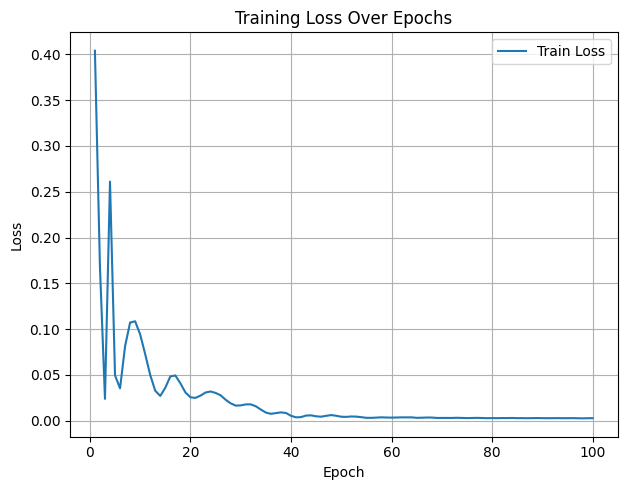

In [2801]:
plt.figure(figsize=(12, 5))

# 1. Đồ thị Loss qua các epoch
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [2802]:
from sklearn import metrics

with torch.no_grad():
    model.eval()
    test_predictions = model(X_test)  
    y_test_original = close_t1_scaler.inverse_transform(y_test.numpy())
    test_predictions = close_t1_scaler.inverse_transform(test_predictions.numpy())

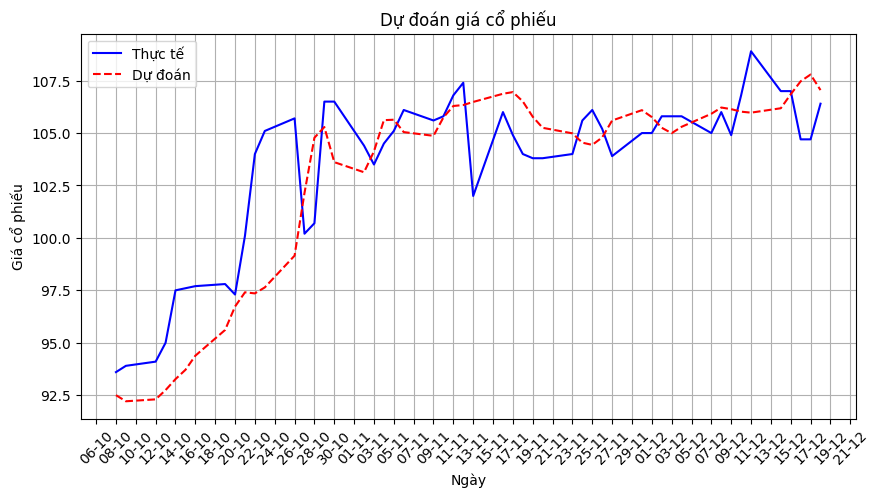

In [2803]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test_original, label="Thực tế", color="blue")
plt.plot(test_dates, test_predictions, label="Dự đoán", color="red", linestyle="dashed")

plt.xlabel("Ngày")
plt.ylabel("Giá cổ phiếu")
plt.title("Dự đoán giá cổ phiếu")
plt.legend()

# Định dạng trục X
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))  # Hiển thị ngày-tháng
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))  # Hiển thị mỗi 5 ngày một nhãn

plt.grid(True)
plt.show()


In [2804]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_original, test_predictions)
mse = mean_squared_error(y_test_original, test_predictions)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 1.8828792572021484
MSE: 6.27946662902832
RMSE: 2.5058863162994385


# Kết hợp 2 mô hình RESNET và LSTM để dự đoán

Ý tưởng bài toán : Dựa tren bài báo : ResNLS: An Improved Model for Stock Price Forecasting

Kết hợp ResNet và LSTM để dự đoán giá Close(T+1), trong đó ResNet (CNN) trích xuất đặc trưng xu hướng giá, còn LSTM học quan hệ chuỗi thời gian, giúp cải thiện độ chính xác so với mô hình đơn lẻ. 

Input: là một chuỗi giá đóng cửa (Close) trong 10 ngày gần nhất.

Output: là T+11

In [2805]:
df_close= df.resample('1D').agg({
    'Close': 'last'
})
df_close = df_close.dropna()
df_close.head(20)


,Close
Date/Time,
2018-10-17,99.0
2018-10-18,99.1
2018-10-19,99.1
2018-10-22,99.1
2018-10-23,99.0
2018-10-24,98.8
2018-10-25,96.8
2018-10-26,96.4
2018-10-29,97.2


In [2809]:
import math
data = pd.DataFrame(pd.to_numeric(df_close['Close']))
dataset = np.reshape(data.values, (df_close.shape[0], 1))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Hàm chia tập train/test
def split_data(dataset, train_day, predict_day):
    x, y = [], []
    for i in range(train_day, len(dataset) - predict_day + 1):
        x.append(dataset[i - train_day: i, 0])
        y.append(dataset[i + predict_day - 1, 0])
    return np.array(x), np.array(y)

# Hàm reshape dữ liệu
def reshape_data(train_data, test_data, days):
    x_train, y_train = split_data(train_data, days, 1)
    x_test, y_test = split_data(test_data, days, 1)
    # Định dạng lại dữ liệu để phù hợp với mô hình LSTM
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    return x_train, y_train, x_test, y_test

# Tạo tập dữ liệu train và test
training_data_len = math.ceil(len(dataset) * 0.9)
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 5:, :]

# Sử dụng 10 ngày liên tiếp làm bước trượt
x_train_10, y_train_10, x_test_10, y_test_10 = reshape_data(train_data, test_data, 10)

print("when sequence length is 5, data shape:", x_train_10.shape, y_train_10.shape, x_test_10.shape, y_test_10.shape)


when sequence length is 5, data shape: (484, 1, 10) (484,) (49, 1, 10) (49,)


In [2810]:
# initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_input = 10; n_hidden = 64

class ResNLS(nn.Module):

    def __init__(self):
        super(ResNLS, self).__init__()

        # intialise weights of the attention mechanism

        # intialise cnn structure
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=n_hidden, kernel_size=3, stride=1, padding=1), # ((5 + 1*2 - 3)/1 + 1) = 5
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(n_hidden, eps=1e-5),
            nn.Dropout(0.1),

            nn.Conv1d(in_channels=n_hidden, out_channels=n_hidden, kernel_size=3, stride=1, padding=1), # ((5 + 1*2 - 3)/1 + 1) = 5
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(n_hidden, eps=1e-5),

            nn.Flatten(),
            nn.Linear(n_input * n_hidden, n_input)
        )

        # intialise lstm structure
        self.lstm = nn.LSTM(n_input, n_hidden, batch_first=True, bidirectional=False)
        self.linear = nn.Linear(n_hidden, 1)


    def forward(self, x):

        cnn_output = self.cnn(x)
        residuals = x + cnn_output

        _, (h_n, _)  = self.lstm(residuals)
        y_hat = self.linear(h_n[-1])

        return y_hat

# initialization
epochs = 50; batch_size = 64

# model instance
model = ResNLS().to(device)

# loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mini-batch training
if x_train_10.shape[0] % batch_size == 0:
    batch_num = int(x_train_10.shape[0] / batch_size)
else:
    batch_num = int(x_train_10.shape[0] / batch_size) + 1

for epoch in range(epochs):
    for j in range(batch_num):

        # prepare training data
        train_input = torch.tensor(x_train_10[j * batch_size : (j+1) * batch_size], dtype=torch.float).to(device)
        train_targe = torch.tensor(y_train_10[j * batch_size : (j+1) * batch_size], dtype=torch.float).to(device)

        # training
        model.train()
        optimizer.zero_grad()
        train_output = model(train_input)
        train_loss = criterion(train_output, train_targe)
        train_loss.backward()
        optimizer.step()

    if (epoch+1) % (epochs/20) == 0:
            print("Epoch: {:>3}, train loss: {:.4f}".format(epoch+1, train_loss.item(), ))

c:\Users\quanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\quanc\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:   5, train loss: 0.0083
Epoch:  10, train loss: 0.0045
Epoch:  15, train loss: 0.0053
Epoch:  20, train loss: 0.0060
Epoch:  25, train loss: 0.0025
Epoch:  30, train loss: 0.0042
Epoch:  35, train loss: 0.0038
Epoch:  40, train loss: 0.0032
Epoch:  45, train loss: 0.0023
Epoch:  50, train loss: 0.0025


In [2811]:
# import packages
from sklearn import metrics


val_input = torch.tensor(x_test_10, dtype=torch.float).to(device)


with torch.no_grad():
    model.eval()
    val_output = model(val_input)
    
predictions = val_output

#đưa về giá trị gốc
predictions = scaler.inverse_transform(predictions.cpu().detach().numpy())
y_test_original = scaler.inverse_transform(y_test_10.reshape(-1, 1))

# Tính toán MAE, MSE, RMSE
mae = metrics.mean_absolute_error(y_test_original, predictions)
mse = metrics.mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)

print("MAE: {:.2F}   MSE: {:.2f}   RMSE: {:.2F}".format(mae, mse, rmse))

MAE: 1.68   MSE: 5.50   RMSE: 2.34
